In [1]:
# Setting up the dependencies

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# Creating the engine
database_path = r"C:\Users\lealr\OneDrive\Desktop\sqlalchemy_challenge\Starter_Code\Resources\hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")


In [3]:
# Reflecting the database into a new model
Base = automap_base()

# Reflecting the tables
Base.prepare(engine, reflect=True)

In [4]:
# Checking the classes 
Base.classes.keys()

['measurement', 'station']

In [5]:
# Saving the references for the precipitation and station analysis
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# The link from python to the database
session = Session(engine)

In [7]:
# Precipitation Analysis
# Find the most recent date in the dataset
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [8]:
# Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.

year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_date)

2016-08-23


In [9]:
# Select only the "date" and "prcp" values.

precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

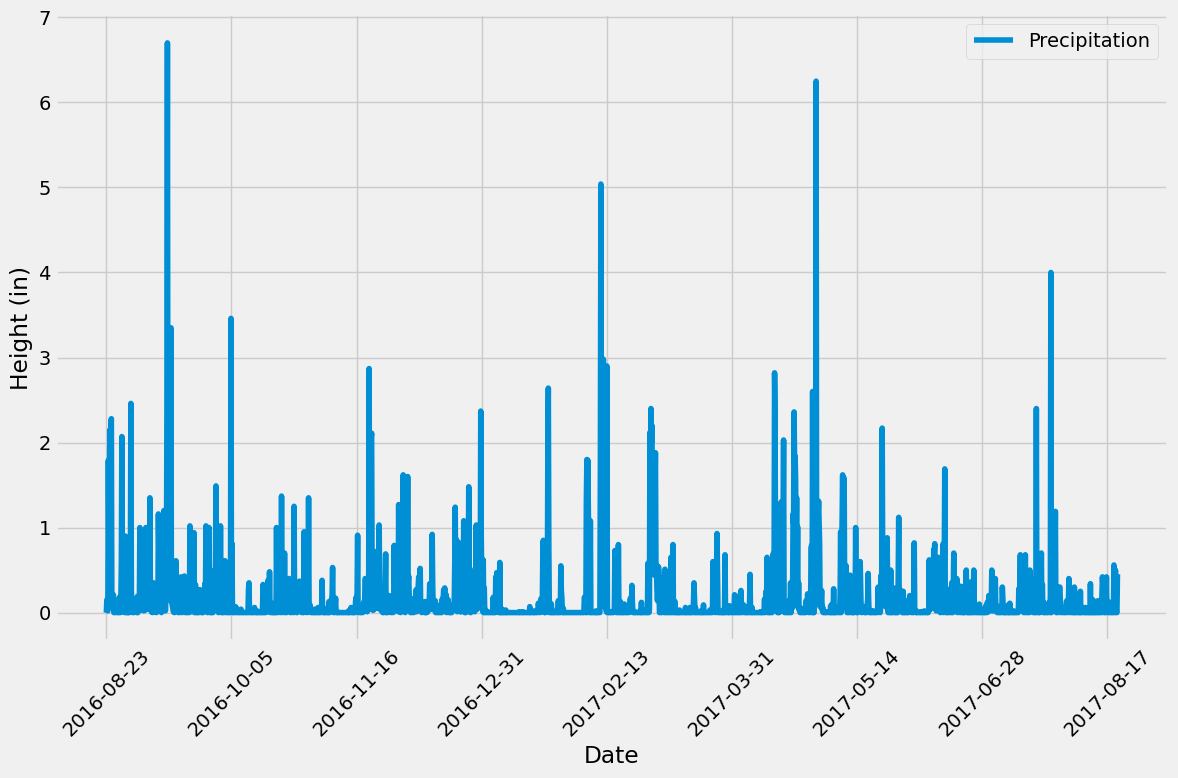

In [10]:
# Load the query results to use pandas
# Selecting the columns to use

prec_df = pd.DataFrame(precipitation_data, columns = ['Date', 'Precipitation']).set_index('Date')

# Sort the data and dropping null values
prec_df = prec_df.sort_values('Date').dropna()

# Plotting the data
prec_df.plot(figsize = (12,8), rot = 90)
plt.ylabel('Height (in)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to print the summary statistics for the precipitation data.

prec_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Station Analysis
station_count = session.query(Station).count()
station_count

9

In [13]:
# Design a query to find the most-active stations (that is, the stations that have the most rows)
# List the stations and observation counts in descending order
active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 


print(active_station)
most_active_station = active_station [0][0]
print(f'The most active station is {most_active_station}')

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
The most active station is USC00519281


In [14]:
# Design a query that calculates the lowest, highest, and average temperatures 
# that filters on the most-active station id found in the previous query.
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(
    Measurement.station == 'USC00519281'
).all()

temperature_stats

[(54.0, 85.0, 71.66378066378067)]

In [15]:
most_recent = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date.desc()).first()
most_recent

('2017-08-18', 79.0)

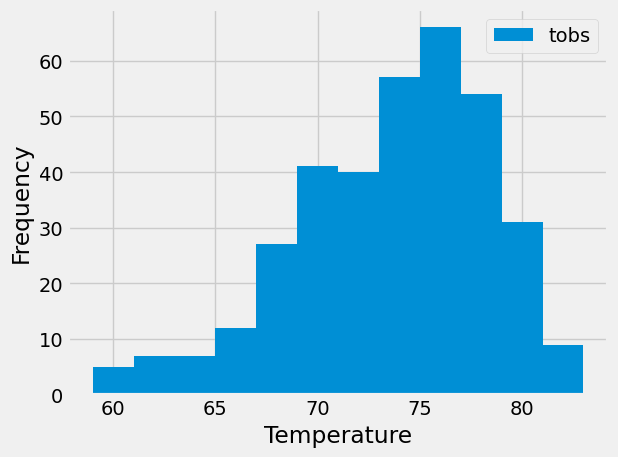

In [16]:
# Design a query to get the previous 12 months of temperature observation (TOBS) data
# The station with the greatest number of observations is USC00519281
# The most recent date collected was '2017-08-18' filtering data from the most recent sample
year_value = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date > '2016-08-18').all()

# Using the collected data to create a dataframe with pandas
year_value_df = pd.DataFrame(year_value)["tobs"]

# Create a histogram of the 'tobs' column with 12 bins
plt.hist(year_value_df, bins=12)

# Add x and y axis labels and a title to the plot
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
# Close session
session.close()